In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.4 MB/s eta 0:00:00


In [2]:
import os
import re
import gc
from tqdm import tqdm
from datetime import date     #calculating age
from datetime import datetime #converting string to date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.metrics import (accuracy_score, precision_score, recall_score, balanced_accuracy_score,
                             confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
df = pd.read_csv(r"train.csv")

In [4]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [7]:
df.columns = df.columns.str.replace('.', '_',regex = False)

In [8]:
df.shape

(233154, 41)

In [9]:
#Checking for the count missing values in our data
df.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [10]:
#Filling missing values in our data Employment_Type feature with the mode
df['Employment_Type'].fillna(df['Employment_Type'].mode()[0],inplace = True)

In [11]:
#Checking the unique values in the Employment_Type column
df['Employment_Type'].unique()

array(['Salaried', 'Self employed'], dtype=object)

In [12]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date_of_Birth                        233154 non-null  object 
 9   Employment_Type                      233154 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [14]:
df['PERFORM_CNS_SCORE_DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [15]:
# function to change age string to number of months
def time_to_months(age):
  age_year, age_month  = age.split(' ')
  age_year = int(age_year.replace('yrs', ''))
  age_month = int(age_month.replace('mon', ''))
  return age_year * 12 + age_month

In [16]:
df['AVERAGE_ACCT_AGE'][0]

'0yrs 0mon'

In [17]:
df['AVERAGE_ACCT_AGE_MONTHS'] = df['AVERAGE_ACCT_AGE'].apply(time_to_months)

In [18]:
df['CREDIT_HISTORY_LENGTH_MONTHS'] = df['CREDIT_HISTORY_LENGTH'].apply(time_to_months)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date_of_Birth                        233154 non-null  object 
 9   Employment_Type                      233154 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [20]:
df[['PERFORM_CNS_SCORE_DESCRIPTION','DisbursalDate','Date_of_Birth']]

,PERFORM_CNS_SCORE_DESCRIPTION,DisbursalDate,Date_of_Birth
0,No Bureau History Available,03-08-18,01-01-84
1,I-Medium Risk,26-09-18,31-07-85
2,No Bureau History Available,01-08-18,24-08-85
3,L-Very High Risk,26-10-18,30-12-93
4,No Bureau History Available,26-09-18,09-12-77
...,...,...,...
233149,D-Very Low Risk,26-10-18,01-08-88
233150,A-Very Low Risk,23-10-18,05-12-88
233151,No Bureau History Available,24-10-18,01-06-76
233152,No Bureau History Available,29-09-18,26-03-94


In [21]:
#Checking the unique values in the PERFORM_CNS_SCORE_DESCRIPTION column
for i in df['PERFORM_CNS_SCORE_DESCRIPTION'].unique():
    print(i)

No Bureau History Available
I-Medium Risk
L-Very High Risk
A-Very Low Risk
Not Scored: Not Enough Info available on the customer
D-Very Low Risk
M-Very High Risk
B-Very Low Risk
C-Very Low Risk
E-Low Risk
H-Medium Risk
F-Low Risk
K-High Risk
Not Scored: No Activity seen on the customer (Inactive)
Not Scored: Sufficient History Not Available
Not Scored: No Updates available in last 36 months
G-Low Risk
J-High Risk
Not Scored: Only a Guarantor
Not Scored: More than 50 active Accounts found


In [22]:
#Creating a function we can use to re-categorize the PERFORM_CNS_SCORE_DESCRIPTION column
def risk_category(i):
    if 'Risk' in i:
        alphab, risk_status  = i.split('-')
        alphab = ''
        return risk_status + ''
    elif 'Not Scored' in i:
        ff, gh  = i.split(': ')
        gh = ''
        return ff + ''
    else:
        return i

In [ ]:
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(risk_category)

In [24]:
#Checking to confirm the unique items in PERFORM_CNS_SCORE_DESCRIPTION column
for i in df['PERFORM_CNS_SCORE_DESCRIPTION'].unique():
    print(i)

No Bureau History Available
Medium Risk
Very High Risk
Very Low Risk
Not Scored
Low Risk
High Risk


In [25]:
df.query('PERFORM_CNS_SCORE_DESCRIPTION == "Not Scored"')[['loan_default','PERFORM_CNS_SCORE_DESCRIPTION']].value_counts()

loan_default  PERFORM_CNS_SCORE_DESCRIPTION
0             Not Scored                       10072
1             Not Scored                        2763
Name: count, dtype: int64

In [26]:
df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

PERFORM_CNS_SCORE_DESCRIPTION
No Bureau History Available    116950
Very Low Risk                   50728
Low Risk                        18294
Not Scored                      12835
Medium Risk                     12412
High Risk                       12025
Very High Risk                   9910
Name: count, dtype: int64

In [27]:
df["loan_default"].value_counts()

loan_default
0    182543
1     50611
Name: count, dtype: int64

In [28]:
df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date_of_Birth                           15433
Employment_Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS_SCORE                         573
PERFORM_CNS_SCORE_DESCRIPTION               7
PRI_NO_OF_ACCTS                   

In [29]:
df['Date_of_Birth'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 233154 entries, 0 to 233153
Series name: Date_of_Birth
Non-Null Count   Dtype 
--------------   ----- 
233154 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [30]:
# plt.figure(figsize=(30,20))
# sns.heatmap(df.corr())
# plt.show()

In [31]:
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], format = 'mixed')

In [32]:
#Using the Date_of_Birth column to extract the age column
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], format = 'mixed')
current_date = pd.to_datetime('today')

In [33]:
df['Age'] = (current_date - df['Date_of_Birth']).dt.days // 365

In [34]:
df['Age']

0         40
1         39
2         38
3         30
4         46
          ..
233149    36
233150    36
233151    48
233152    30
233153    40
Name: Age, Length: 233154, dtype: int64

In [35]:
df = df.drop(['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH','Date_of_Birth'], axis=1)

In [36]:
df['Employment_Type'].unique()

array(['Salaried', 'Self employed'], dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Employment_Type                      233154 non-null  object        
 9   DisbursalDate                        233154 non-null  datetime64[ns]
 

In [38]:
df.shape

(233154, 41)

In [39]:
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
# ohetransform = ohe.fit_transform(df[['PERFORM_CNS_SCORE_DESCRIPTION']])
# ohetransform.head()

In [40]:
# df = pd.concat([df, ohetransform], axis=1)

In [41]:
PSCORE_DESCRIPTION_encoder = LabelEncoder()
PSCORE_DESCRIPTION_encoder.fit(df['PERFORM_CNS_SCORE_DESCRIPTION'])
df['PERFORM_CNS_SCORE_DESCRIPTION'] = PSCORE_DESCRIPTION_encoder.transform(df['PERFORM_CNS_SCORE_DESCRIPTION'])

In [42]:
Employment_Type_encoder = LabelEncoder()
Employment_Type_encoder.fit(df['Employment_Type'])
df['Employment_Type'] = Employment_Type_encoder.transform(df['Employment_Type'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Employment_Type                      233154 non-null  int64         
 9   DisbursalDate                        233154 non-null  datetime64[ns]
 

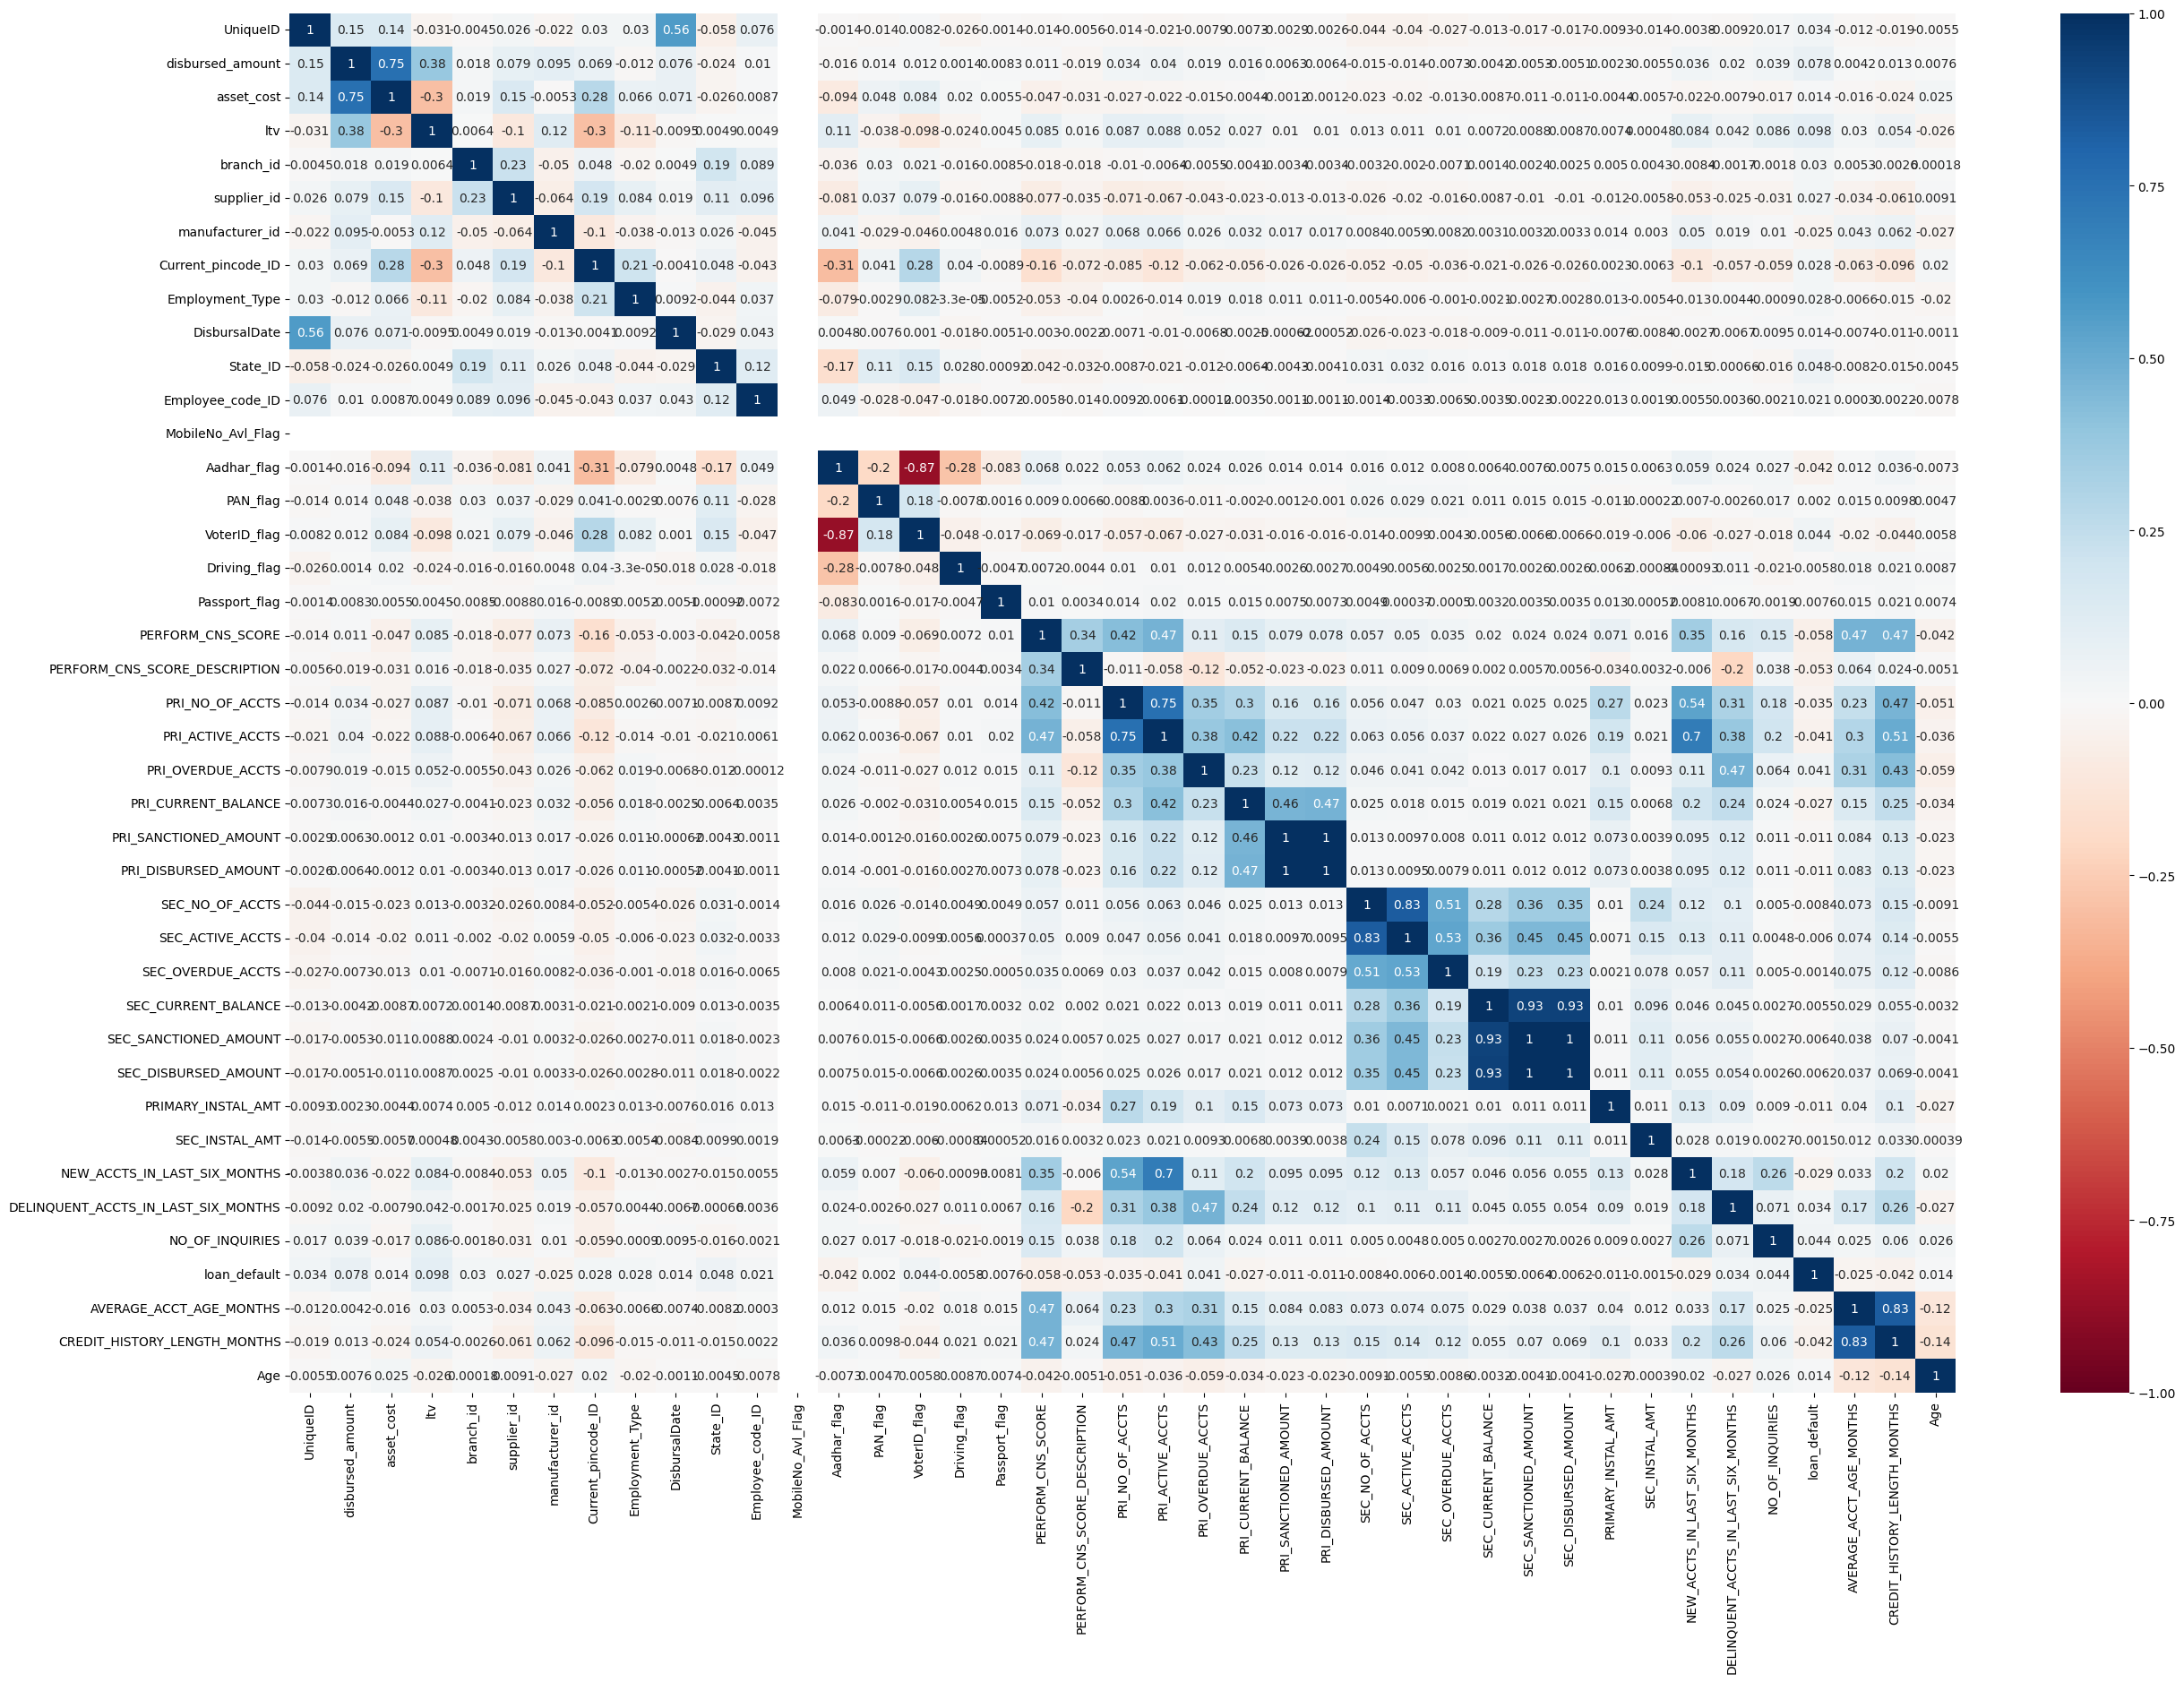

In [44]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot= True)
plt.show()

In [45]:
df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Employment_Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS_SCORE                         573
PERFORM_CNS_SCORE_DESCRIPTION               7
PRI_NO_OF_ACCTS                           108
PRI_ACTIVE_ACCTS                  

In [46]:
df['NO_OF_INQUIRIES'].unique()

array([ 0,  1,  4,  2,  3,  5,  6, 12,  9,  8, 18,  7, 19, 11, 10, 15, 14,
       17, 20, 13, 23, 28, 16, 22, 36])

In [47]:
df['loan_default'].value_counts(normalize = True)

loan_default
0    0.782929
1    0.217071
Name: proportion, dtype: float64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Employment_Type                      233154 non-null  int64         
 9   DisbursalDate                        233154 non-null  datetime64[ns]
 

In [256]:
df['Employee_code_ID'].unique()

array([1998, 1646,  115, ..., 3198, 3705, 3479])

In [49]:
df.loc[:,'No_of_Accounts'] = df['PRI_NO_OF_ACCTS'] + df['SEC_NO_OF_ACCTS']
df.loc[:,'PRI_Inactive_accounts'] = df['PRI_NO_OF_ACCTS'] - df['PRI_ACTIVE_ACCTS']
df.loc[:,'SEC_Inactive_accounts'] = df['SEC_NO_OF_ACCTS'] - df['SEC_ACTIVE_ACCTS']
df.loc[:,'Total_Inactive_accounts'] = df['PRI_Inactive_accounts'] + df['SEC_Inactive_accounts']
df.loc[:,'Total_Overdue_Accounts'] = df['PRI_OVERDUE_ACCTS'] + df['SEC_OVERDUE_ACCTS']
df.loc[:,'Total_Current_Balance'] = df['PRI_CURRENT_BALANCE'] + df['SEC_CURRENT_BALANCE']
df.loc[:,'Total_Sanctioned_Amount'] = df['PRI_SANCTIONED_AMOUNT'] + df['SEC_SANCTIONED_AMOUNT']
df.loc[:,'Total_Disbursed_Amount'] = df['PRI_DISBURSED_AMOUNT'] + df['SEC_DISBURSED_AMOUNT']
df.loc[:,'Total_Installment'] = df['PRIMARY_INSTAL_AMT'] + df['SEC_INSTAL_AMT']

In [77]:
X = df.drop(['PRI_NO_OF_ACCTS','SEC_NO_OF_ACCTS','PRI_CURRENT_BALANCE','PRI_Inactive_accounts','SEC_Inactive_accounts',
            'PRI_SANCTIONED_AMOUNT','SEC_NO_OF_ACCTS','PRI_NO_OF_ACCTS','PRI_DISBURSED_AMOUNT','PRI_ACTIVE_ACCTS',
            'PRI_OVERDUE_ACCTS','SEC_CURRENT_BALANCE','SEC_SANCTIONED_AMOUNT', 'SEC_OVERDUE_ACCTS','PERFORM_CNS_SCORE',
            'SEC_DISBURSED_AMOUNT','PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT','disbursed_amount','SEC_ACTIVE_ACCTS',
             'branch_id','Current_pincode_ID','Employment_Type','Employee_code_ID',
             'DisbursalDate','Driving_flag','Passport_flag','loan_default','UniqueID','MobileNo_Avl_Flag',
             'supplier_id','Aadhar_flag','PAN_flag',],axis=1)
y = df['loan_default']

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   asset_cost                           233154 non-null  int64  
 1   ltv                                  233154 non-null  float64
 2   manufacturer_id                      233154 non-null  int64  
 3   State_ID                             233154 non-null  int64  
 4   VoterID_flag                         233154 non-null  int64  
 5   PERFORM_CNS_SCORE_DESCRIPTION        233154 non-null  int64  
 6   NEW_ACCTS_IN_LAST_SIX_MONTHS         233154 non-null  int64  
 7   DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  233154 non-null  int64  
 8   NO_OF_INQUIRIES                      233154 non-null  int64  
 9   AVERAGE_ACCT_AGE_MONTHS              233154 non-null  int64  
 10  CREDIT_HISTORY_LENGTH_MONTHS         233154 non-null  int64  
 11  Age          

In [72]:
X

array([[-0.92189534,  1.2921334 , -0.85545269, ..., -0.09471443,
        -0.09436839, -0.08815429],
       [-0.54448189, -0.13237161,  0.91182229, ..., -0.07365743,
        -0.07333674, -0.07508418],
       [-0.76565145,  1.29911627, -0.85545269, ..., -0.09471443,
        -0.09436839, -0.08815429],
       ...,
       [-0.24561266, -2.29531487, -0.85545269, ..., -0.09471443,
        -0.09436839, -0.08815429],
       [-0.13613637, -2.23857907, -0.85545269, ..., -0.09471443,
        -0.09436839, -0.08815429],
       [ 2.11900139, -0.69274674, -0.85545269, ..., -0.09471443,
        -0.09436839, -0.08815429]])

In [79]:
min_scaler = MinMaxScaler() #intro of scaling
X = min_scaler.fit_transform(X)

In [67]:
# std_scaler = StandardScaler()
# X = std_scaler.fit_transform(X)

In [270]:
# X = df.drop(['loan_default','UniqueID','supplier_id','State_ID','Aadhar_flag','PAN_flag','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS','PRI_SANCTIONED_AMOUNT','PRI_NO_OF_ACCTS','PRI_DISBURSED_AMOUNT','SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS','SEC_CURRENT_BALANCE','SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT','DisbursalDate','branch_id','manufacturer_id','Current_pincode_ID','Employment_Type','Employee_code_ID','VoterID_flag','Driving_flag','Passport_flag'], axis=1)
# y = df['loan_default']

In [275]:
# X = df.drop(['loan_default','UniqueID','MobileNo_Avl_Flag','supplier_id','State_ID','Aadhar_flag','PAN_flag','PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS','SEC_NO_OF_ACCTS','SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS','DisbursalDate','branch_id','manufacturer_id','Current_pincode_ID','Employment_Type','Employee_code_ID','VoterID_flag','Driving_flag','Passport_flag'], axis=1)
# y = df['loan_default']

In [68]:
X.shape

(233154, 17)

In [70]:
y

0         0
1         1
2         0
3         1
4         1
         ..
233149    0
233150    0
233151    0
233152    0
233153    0
Name: loan_default, Length: 233154, dtype: int64

In [79]:
# # Splitting
# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# # Defining models
# models = [
#     ('Logistic Regression', LogisticRegression( random_state = 42)),
#     ('Decision Tree', DecisionTreeClassifier(random_state = 42)),
#     ('Random Forest', RandomForestClassifier(random_state = 42)),
#     ('Gradient Boosting', GradientBoostingClassifier(random_state = 42)),
#     ('Support Vector Machine', SVC(probability=True)),
#     ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 5)),
#     ('XGBoost', XGBClassifier(random_state = 42)),
#     ('LightGBM', LGBMClassifier(random_state = 42)),
#     ('CatBoost', CatBoostClassifier(silent=True))
# ]

# # Initializing an empty list
# results_list = []

# # Evaluation
# for name, model in models:
#     model.fit(xtrain, ytrain)
#     y_pred = model.predict(xtest)
#     y_pred_proba = model.predict_proba(xtest)[:, 1]

#     accuracy = accuracy_score(ytest, y_pred)
#     precision = precision_score(ytest, y_pred)
#     recall = recall_score(ytest, y_pred)
#     balanced_acc = balanced_accuracy_score(ytest, y_pred)
#     roc_auc = roc_auc_score(ytest, y_pred_proba)
#     conf_matrix = confusion_matrix(ytest, y_pred)

#     results_list.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'Balanced Accuracy': balanced_acc, 'ROC-AUC': roc_auc})

#     # Displaying the confusion matrix using ConfusionMatrixDisplay
#     disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
#     disp.plot(cmap=plt.cm.Blues)
#     plt.title(f'Confusion Matrix for {name}')
#     plt.show()

#     # Displaying the ROC curve using RocCurveDisplay
#     RocCurveDisplay.from_estimator(model, xtest, ytest)
#     plt.title(f'ROC Curve for {name}')
#     plt.show()

# results = pd.DataFrame(results_list)

In [82]:
# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Print resampled class distribution
print("Resampled class distribution:", Counter(y_res))

Resampled class distribution: Counter({0: 50611, 1: 50611})


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


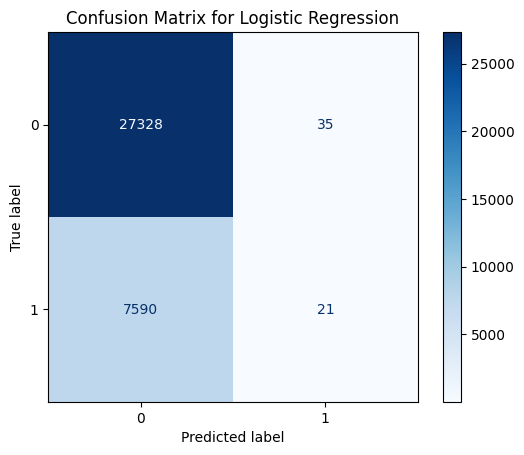

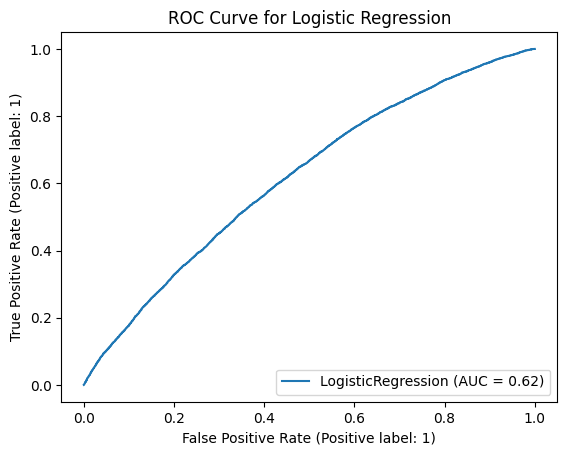

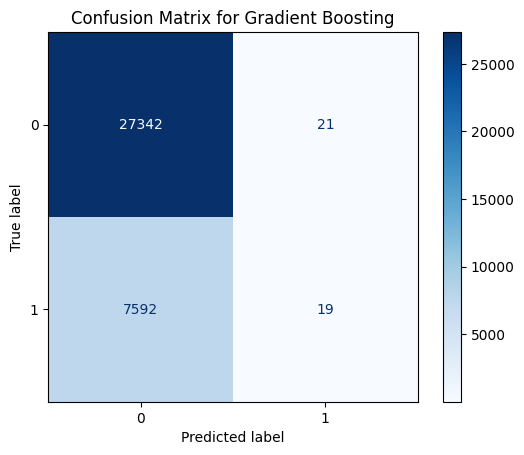

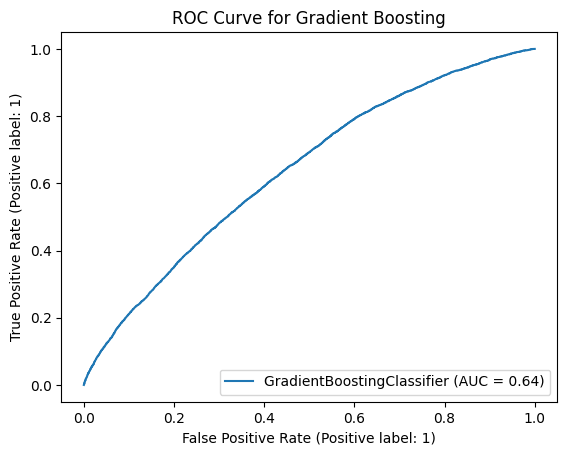

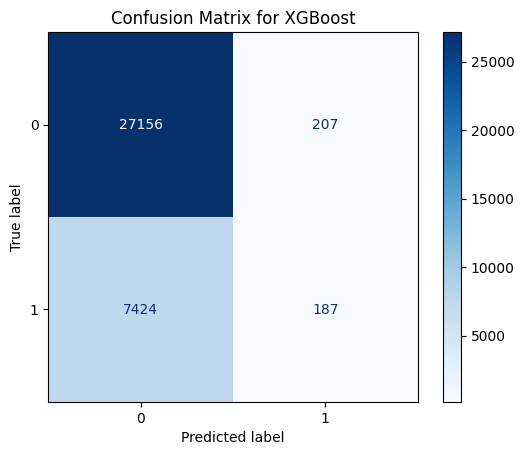

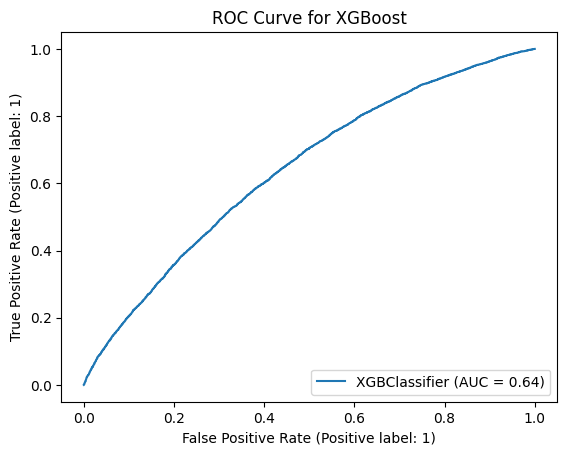

[LightGBM] [Info] Number of positive: 43000, number of negative: 155180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2279
[LightGBM] [Info] Number of data points in the train set: 198180, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216974 -> initscore=-1.283386
[LightGBM] [Info] Start training from score -1.283386


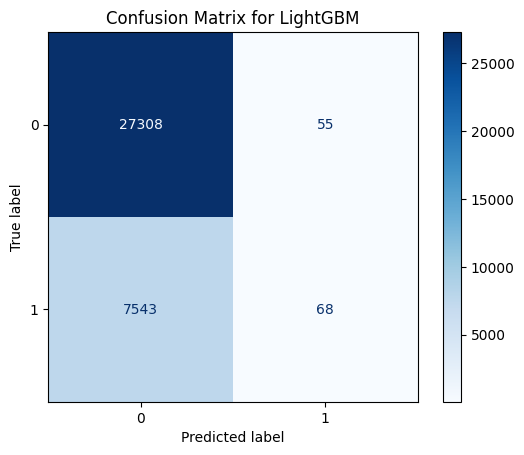

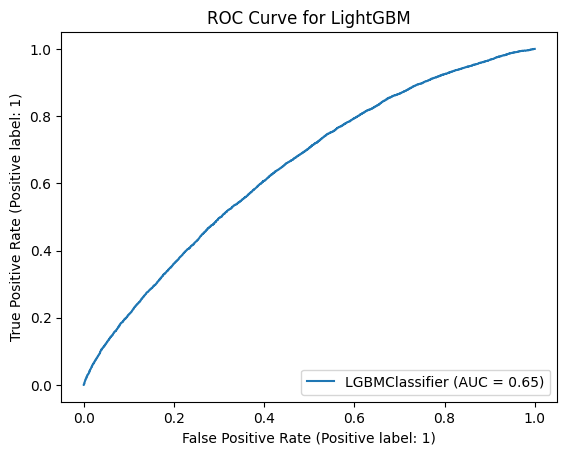

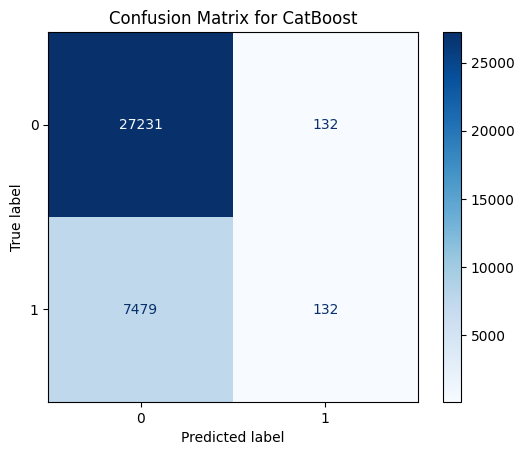

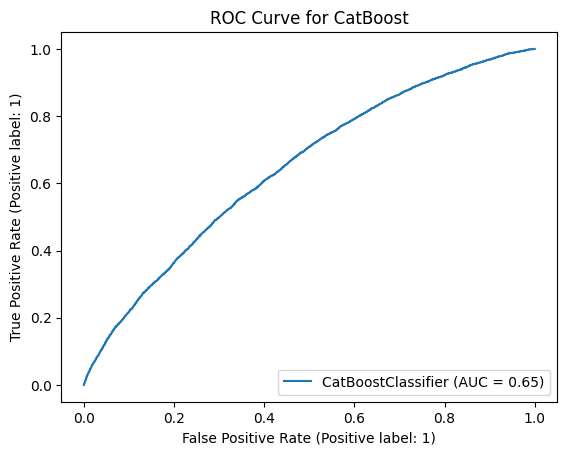

In [89]:
# Splitting
# xtrain, xtest, ytrain, ytest = train_test_split(X_res, y_res, test_size=0.15, random_state=42)

# xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15, random_state=42)

# Defining models
models = [
    ('Logistic Regression', LogisticRegression(random_state = 42)),
    # ('Decision Tree', DecisionTreeClassifier(random_state = 42)),
    # ('Random Forest', RandomForestClassifier(random_state = 42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state = 42)),
    # ('Support Vector Machine', SVC(probability=True)),
    # ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 5)),
    ('XGBoost', XGBClassifier(random_state = 42)),
    ('LightGBM', LGBMClassifier(random_state = 42)),
    ('CatBoost', CatBoostClassifier(silent=True))
]

# Initializing an empty list
results_list = []

# Evaluation
for name, model in models:
  model.fit(xtrain, ytrain)
  y_pred = model.predict(xtest)
  y_pred_proba = model.predict_proba(xtest)[:, 1]

  accuracy = accuracy_score(ytest, y_pred)
  precision = precision_score(ytest, y_pred)
  recall = recall_score(ytest, y_pred)
  balanced_acc = balanced_accuracy_score(ytest, y_pred)
  roc_auc = roc_auc_score(ytest, y_pred_proba)
  conf_matrix = confusion_matrix(ytest, y_pred)

  results_list.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'Balanced Accuracy': balanced_acc, 'ROC-AUC': roc_auc})

  # Displaying the confusion matrix using ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
  disp.plot(cmap=plt.cm.Blues)
  plt.title(f'Confusion Matrix for {name}')
  plt.show()

  # Displaying the ROC curve using RocCurveDisplay
  RocCurveDisplay.from_estimator(model, xtest, ytest)
  plt.title(f'ROC Curve for {name}')
  plt.show()

results = pd.DataFrame(results_list)

In [88]:
results

,Model,Accuracy,Precision,Recall,Balanced Accuracy,ROC-AUC
0,Logistic Regression,0.781981,0.375000,0.002759,0.500740,0.618053
1,Random Forest,0.773203,0.362938,0.055840,0.514289,0.606439
2,XGBoost,0.781809,0.474619,0.024570,0.508502,0.640794
3,LightGBM,0.782753,0.552846,0.008934,0.503462,0.646041
4,CatBoost,0.782381,0.500000,0.017343,0.506260,0.647296
